In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Web Developer Workflow with Vertex Extensions

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_extensions/web_developer_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_extensions%2Fweb_developer_workflow_vertexai_extensions.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/main/genai-on-vertex-ai/vertex_extensions/web_developer_workflow_vertexai_extensions.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/tree/main/genai-on-vertex-ai/vertex_extensions/web_developer_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | [Lei Pan](https://github.com/genaimagician)|
| Reviewers(s) | [Meltem Subasioglu](https://github.com/5Y5TEM)|
| Last updated | 2024-04-08: Initial Publication |

## Overview

In this notebook, we will show you how to use vertex AI code extensions to build and deploy a static web application inluding following steps:

- Generate PRD using Gemini API
- Creating a pre-built code interpreter extension in your project
- Using code interpreter to build up the website according to the PRD
- Using GCS API to deploy the website

▶ If you're already familiar with Google Cloud and the Vertex Extensions Code Interpreter Extension, you can skip reading between here and the "**Getting Started**" section.

### Vertex AI Extensions

[Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) is a platform for creating and managing extensions that connect large language models to external systems via APIs. These external systems can provide LLMs with real-time data and perform data processing actions on their behalf. You can use pre-built or third-party extensions in Vertex AI Extensions.

### Vertex AI Extensions Code Interpreter Extension

The [Code Interpreter](https://console.cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#google_code_interpreter_extension) extension provides access to a Python interpreter with a sandboxed, secure execution environment. It lets you generate and execute Python code to:

* Analyze, clean, transform, and reshape your datasets
* Visualize data in charts and graphs
* Execute calculations

### Using this Notebook

Colab is recommended for running this notebook, but it can run in any iPython environment where you can connect to Google Cloud, install pip packages, etc.

If you're running outside of Colab, depending on your environment you may need to install pip packages (like pandas) that are included in the Colab environment by default but are not part of the Python Standard Library. You'll also notice some comments in code cells that look like #@something -- these may contain informative text

This tutorial uses the following Google Cloud services and resources:

* Vertex AI Extensions
* Google Cloud Storage Client

This notebook has been tested in the following environment:

* Python version = 3.10.12
* [google-cloud-aiplatform](https://pypi.org/project/google-cloud-aiplatform/) version = 1.4.7

### Useful Tips

1. This notebook uses Generative AI cababilities. Re-running a cell that uses Generative AI capabilities may produce similar but not identical results.
2. Because of #1, it is possible that an output from Code Interpreter producess errors. If that happens re-run the cell that produced the coding error. The different generated code will likely be bug free. The `run_code_interpreter` method below helps automate this.
3. The use of Extensions and other Generative AI capabilities is subject to service quotas. Running the notebook using "Run All" may exceed  your Queries per minute (QPM) limitations. Run the notebook manually and if you get a quota error pause for up to 1 minute before retrying that cell. Code Interpreter uses Gemini on the backend and is subject to the Gemini quotas, [view your Gemini quotas here](https://console.cloud.google.com/iam-admin/quotas?pageState=(%22allQuotasTable%22:(%22f%22:%22%255B%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22base_model_5C_22_22%257D_2C%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22gemini_5C_22_22%257D%255D%22%29%29&e=13802955&mods=logs_tg_staging).
4. The Code Interpreter Extension is stateless and therefore every request to Code Interpreter does not have knowledge of previous operations nor files injested or produced in previous steps. Therefore, with any request to Code Interpreter you need to submit all files and instructions for that request to complete successfully.


## Getting Started


### Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

### Google Cloud Permissions
Make sure you have been [granted the following roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access) for the GCP project you'll access from this notebook:
* [`roles/aiplatform.user`](https://cloud.google.com/vertex-ai/docs/general/access-control#aiplatform.user)

### Install Vertex AI SDK and other required packages


In [ ]:
!pip install google-cloud-aiplatform --upgrade

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

You may see the restart reported as a crash, but it is working as-intended -- you are merely restarting the runtime.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Outside of Colab: Install the Google Cloud CLI

If you are running this notebook in your own environment, you need to install the [Cloud SDK](https://cloud.google.com/sdk) (aka `gcloud`).

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
import vertexai

PROJECT_ID = "your project id"  # @param {type:"string"}
REGION = "your region"  # @param {type: "string"}
API_ENV = "aiplatform.googleapis.com"  # @param {type:"string"}
!gcloud config set project {PROJECT_ID}


vertexai.init(
    project=PROJECT_ID,
    location=REGION,
    api_endpoint=f"{REGION}-{API_ENV}",
)

Updated property [core/project].


## Using Extensions to Build and Deploy a Static Web Application Tutorial

### Import libraries

In [ ]:
from vertexai.generative_models import GenerativeModel
from vertexai.preview import extensions
import base64
import io
import json
import pprint
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Struct
from PIL import Image
from IPython.display import display
from IPython.display import Markdown
import textwrap
from google.cloud import storage

### Step 1: Generate a PRD using Gemini API

In [ ]:
vertexai.init(project=PROJECT_ID, location=REGION)
model = GenerativeModel(model_name="gemini-1.0-pro")

response = model.generate_content("""Write a simple website log-in page product requirement document with 2 features including 1) use html, css, and javascript to make a login page. The login button should be red. Javascript should validate login username as "leilei", password as "test1234". 2) deploy this html, css, javascript file to GCS bucket as a static web hosting.""")

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
to_markdown(response.text)

> **Product Requirement Document: Website Log-In Page**
> 
> **Purpose**
> 
> The purpose of this product requirement document is to define the requirements for a website log-in page.
> 
> **Features**
> 
> The website log-in page must include the following features:
> 
> 1. **Use HTML, CSS, and JavaScript to make a login page. The login button should be red.**
> 2. **Deploy this HTML, CSS, JavaScript file to GCS bucket as a static web hosting.**
> 
> **Functional Requirements**
> 
> * The log-in page must include a field for the user to enter their username.
> * The log-in page must include a field for the user to enter their password.
> * The log-in page must have a button that the user can click to submit their login information.
> * The login button should be red.
> * When the user clicks the login button, JavaScript should validate the login username as "leilei" and the password as "test1234".
> * If the username and password are valid, the user should be redirected to the home page.
> * If the username and password are invalid, the user should be shown an error message.
> 
> **Non-Functional Requirements**
> 
> * The log-in page must be responsive, so that it can be used on devices of all sizes.
> * The log-in page must be secure, so that the user's information is protected.
> 
> **Deployment Requirements**
> 
> * The HTML, CSS, and JavaScript files for the log-in page must be deployed to a GCS bucket as a static web hosting.
> * The GCS bucket must be configured to serve the log-in page at the root URL.
> 
> **Acceptance Criteria**
> 
> The log-in page will be considered complete when the following acceptance criteria have been met:
> 
> * The log-in page can be accessed at the root URL of the GCS bucket.
> * The log-in page includes a field for the user to enter their username.
> * The log-in page includes a field for the user to enter their password.
> * The log-in page has a button that the user can click to submit their login information.
> * The login button is red.
> * When the user clicks the login button, JavaScript validates the login username as "leilei" and the password as "test1234".
> * If the username and password are valid, the user is redirected to the home page.
> * If the username and password are invalid, the user is shown an error message.

### Step 2: Create a Code Interpreter Extension

Now you can create the extension itself. The following cell uses the Python SDK to import the extension (thereby creating it) in Vertex AI Extensions.

In [ ]:
extension_code_interpreter = extensions.Extension.from_hub("code_interpreter")
extension_code_interpreter

In [ ]:
extensions.Extension.list()

### Step 3: Use Code Interpreter to Build the Web App



In [ ]:
# Get the prompts from the PRD
prompt = """
Please generate code for the feature below and put html, css, javascript into one file:

Log-In Page Interface:
Use HTML, CSS, and JavaScript to create a log-in page.
The log-in form should include fields for username and password.
The login button should be red.
Implement JavaScript validation to ensure that the username is "leilei" and the password is "test1234".

Save html, css, and javascript files to index.html file.
"""

response = extension_code_interpreter.execute(
    operation_id = "generate_and_execute",
    operation_params = {"query": prompt},
)

pprint.pprint(response)

In [ ]:
# Helper function to parse the output from each example query
def parse_output_files(outputFiles):
    IMAGE_FILE_EXTENSIONS = set(["jpg", "jpeg", "png"])
    # Sort the output_files so images are displayed before other files such as JSON
    for output_file in sorted(
        outputFiles,
        key=lambda x: x["name"].split(".")[-1] not in IMAGE_FILE_EXTENSIONS,
    ):
        file_name = output_file.get("name")
        file_contents = base64.b64decode(output_file.get("contents"))
        print("Output Files: \n=======================\n")
        print(f"File Name: {file_name}\n")

        if file_name.endswith(".html"):
          pprint.pprint(file_contents.decode(), compact=False, width=160)
        else:
          print(f"File Contents: {file_contents.decode()}\n")
    return file_contents.decode()

In [ ]:
index_page = parse_output_files(response["output_files"])

Output Files: 

File Name: index.html

('\n'
 '    <!DOCTYPE html>\n'
 '    <html>\n'
 '    <head>\n'
 '        <title>Login Page</title>\n'
 '        <style>\n'
 '            body {\n'
 '                margin: 0;\n'
 '                padding: 0;\n'
 '                font-family: sans-serif;\n'
 '            }\n'
 '\n'
 '            .container {\n'
 '                display: flex;\n'
 '                justify-content: center;\n'
 '                align-items: center;\n'
 '                height: 100vh;\n'
 '            }\n'
 '\n'
 '            form {\n'
 '                border: 1px solid #ccc;\n'
 '                padding: 30px;\n'
 '                border-radius: 5px;\n'
 '            }\n'
 '\n'
 '            label {\n'
 '                display: block;\n'
 '                margin-bottom: 10px;\n'
 '            }\n'
 '\n'
 '            input[type="text"], input[type="password"] {\n'
 '                width: 100%;\n'
 '                padding: 10px;\n'
 '                margin-bottom

In [ ]:
def write_file(filename, content):
    with open(filename, "w") as f:
        f.write(content)

In [ ]:
write_file("index.html", index_page)

### Step 4: Use GCS API to Deploy the Web App


In [ ]:
def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    generation_match_precondition = None

    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)

    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

In [ ]:
upload_blob("your bucket name","index.html","index.html")

File index.html uploaded to index.html.


Click the Authenticated URL of the index.html file in your GCS bucket to check out the live update.

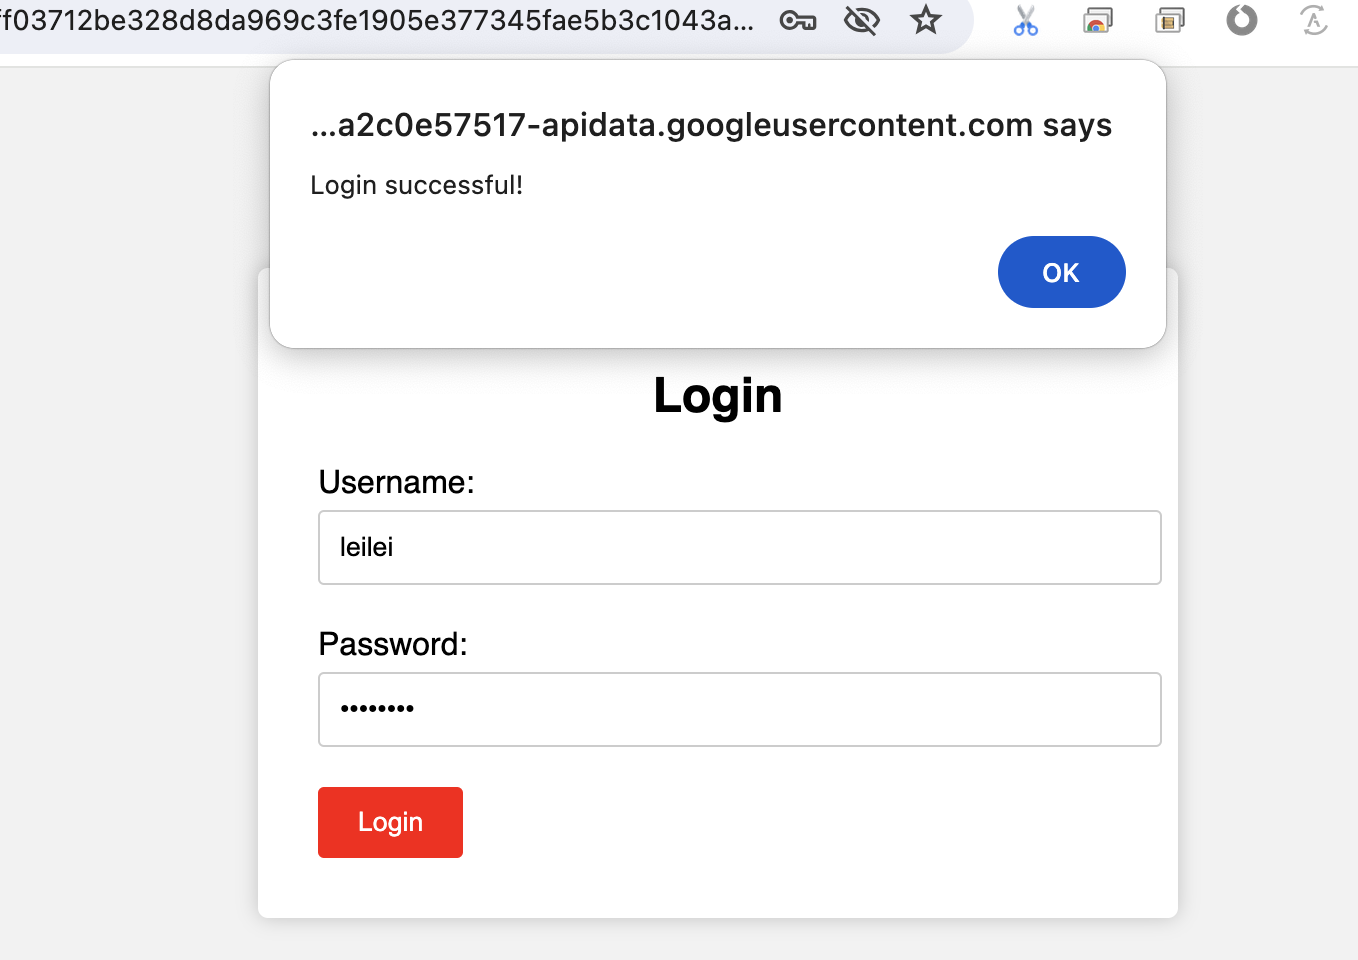

## Cleaning up

Clean up extension resources created in this notebook.

In [ ]:
extension_code_interpreter.delete()

INFO:google.cloud.aiplatform.base:Deleting Extension : projects/certain-haiku-391918/locations/us-central1/extensions/2441443579244052480
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/656421903914/locations/us-central1/operations/7221688063104122880
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/certain-haiku-391918/locations/us-central1/extensions/2441443579244052480
